In [74]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### 2) Considere el conjunto de datos "data2" del fichero `data_exam1.xlsx`

- De acuerdo al análisis del ítem anterior proponga una transformación (raíz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interprételo y valide los supuestos del modelo.

$\epsilon_i \sim N(0, \sigma^2)$

#### **Solución:**

Teniendo en cuenta lo mencionado anteriormente, se procede inicialmente a realizar un análisis exploratorio de los datos en cuestión, con el objetivo de obtener una mayor comprensión del comportamiento de las variables involucradas y así identificar patrones o relaciones importantes que puedan influir en el modelo a utilizar.

#### 1. Revisión inicial de los datos ####


In [75]:
# Carga de base de datos para el análisis
df = pd.read_excel('data_exam1.xlsx', sheet_name = "data2")

# Resumen de los datos
print(df.info())

# Descripción estadística
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
                 Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01


Los datos contienn dos columnas, de las cuales, ambas cuentan con observaciones de tipo flotante. Además, se puede ver una descripción estadística de los datos y que se cuenta con un total de 1000 observaciones.

#### 2. Verificar valores faltante o nulos ####


In [76]:
# Mostrar la cantidad de observaciones nulas con las que cuenta el conjunto de datos
df.isna().sum()

Y    0
X    0
dtype: int64

Se puede ver que ninguna de las columnas de los datos, cuenta con valores nulos.

#### 3. Distribucción de los datos ####


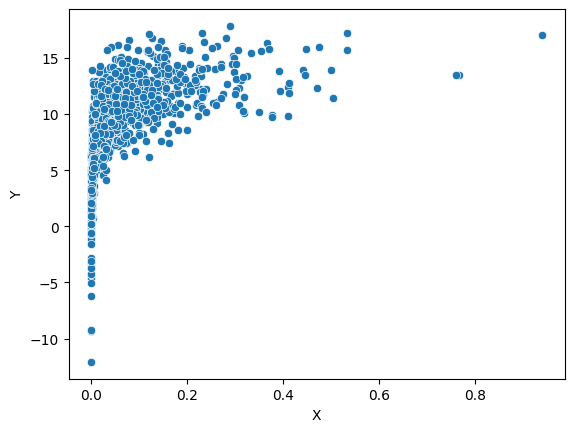

Correlación de Pearson entre X y Y: 0.5203755558151766


In [77]:
# Scatter plot entre las variables flotantes y la variable categorica
sns.scatterplot(x='X', y='Y', data=df)

# Mostrar el gráfico
plt.show()

# Mostrar correlación entre ambas variables
correlacion = df['X'].corr(df['Y'])
print(f"Correlación de Pearson entre X y Y: {correlacion}")


A partir del gráfico, parece que la relación entre las variables $X$ e $Y$ no es lineal. Este comportamiento sugiere una posible relación no lineal, como una relación de potencia o logarítmica. Además, se obtiene un valor de 0.52 para la correlación de Pearson, lo cual indica una correlación lineal moderada. Sin embargo, esta conclusión se basa únicamente en la interpretación de este estadístico, ya que el gráfico sugiere un comportamiento diferente. Por esta razón, se propone aplicar una transformación logarítmica a la variable $X$, con el fin de obtener un modelo con un comportamiento lineal.

#### 4. Transformación de variable X ####

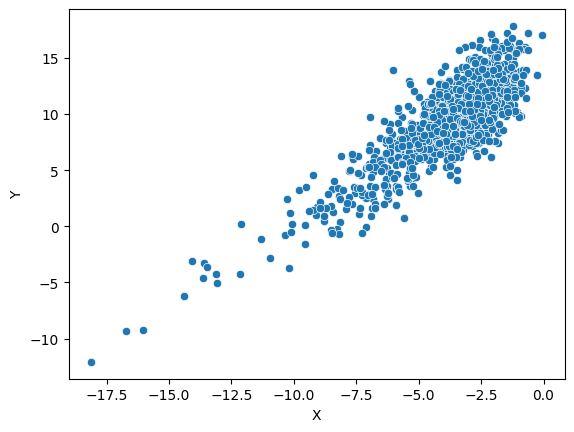

Correlación de Pearson entre X y Y: 0.8555678352304882


In [78]:
# Transformación de la variable X
df["X"] = np.log(df["X"])

# Eliminar filas que tienen NaN en la columna 'X'
df = df.dropna(subset=['X'])

# Scatter plot entre las variables 'X' e 'Y'
sns.scatterplot(x='X', y='Y', data=df)

# Mostrar el gráfico
plt.show()

# Mostrar correlación entre ambas variables luego de la transformación
correlacion = df['X'].corr(df['Y'])
print(f"Correlación de Pearson entre X y Y: {correlacion}")

Al observar la gráfica obtenida tras la transformación, se puede apreciar claramente que el comportamiento entre ambas variables tiende a ser lineal. Por lo tanto, se considera óptima la transformación logarítmica de la variable $X$. Además, el valor de la correlación de Pearson entre $X$ e $Y$ es de 0.856, lo que sugiere una fuerte correlación lineal. A partir de este análisis, es importante destacar que, al aplicar esta transformación, se puede desarrollar un modelo de regresión lineal que permita predecir de manera más precisa el comportamiento de la variable dependiente.

Ahora bien, sabiendo lo anterior, se procede a realizar la configuración del modelo de regresión lineal para estas variables.

#### 5. Modelo de regresión lineal ####

In [79]:
# Definir las variables independientes y dependiente
X = df[['X']]  # Variables independientes
X = sm.add_constant(X)  # Agregar una constante
Y = df['Y']  # Variable dependiente

# Calcular la transpuesta de X
X_T = X.T

# Multiplicar X^T por X
X_T_X = np.dot(X_T, X)

# Calcular la inversa de la matriz X_T_X
X_T_X_inv = np.linalg.inv(X_T_X)

# Multiplicar X^T por Y
X_T_Y = np.dot(X_T, Y)

# Solución final para los coeficientes de beta

beta = np.dot(X_T_X_inv, X_T_Y)

# Mostrar el resultado
print(f"El modelo de regresión lineal estaría definido de la siguiente forma: \n y_hat = {beta[0]} + {beta[1]} * X ")



El modelo de regresión lineal estaría definido de la siguiente forma: 
 y_hat = 15.170560781140683 + 1.4986842869871608 * X 


Teniendo en cuenta los resultados previamente presentados, se puede interpretar lo siguiente:

 - El valor de 15.17 corresponde al valor que toma la variable $Y$ cuando todas la variable explicativa es iguale a 0.
 - El coeficiente 1.499 indica que por cada incremento unitario en la variable $X$, la variable $Y$ aumenta en esa misma cantidad.

Además, es importante destacar que los puntos de interpretación anteriormente mencionados, son teniendo en cuenta que la variable explicativa tuvo una transformación. Ahora bien, teniendo en cuenta esto, ahora se procede a validar los supuestos del modelo.

#### 6. Supuestos del modelo lineal ####

1. Esperanza de los errores es cero --- One-sample-t-test

2. Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling

3. Independendia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).

4. Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan


Interpretación general de un test: Si el p-valor <= $\alpha$ se rechaza la hipotesis nula $H_0$, en caso contrario si p-valor > $\alpha$ NO se rechaza la hipotesis nula $H_0$. Por defecto el valor de $\alpha$ se toma en 0.05, y se conoce como nivel de significancia de la prueba.

In [80]:
# Calculo de los valores estimados para la variable y
y_hat = np.dot(X, beta)

# Residuales
residuales = Y - y_hat

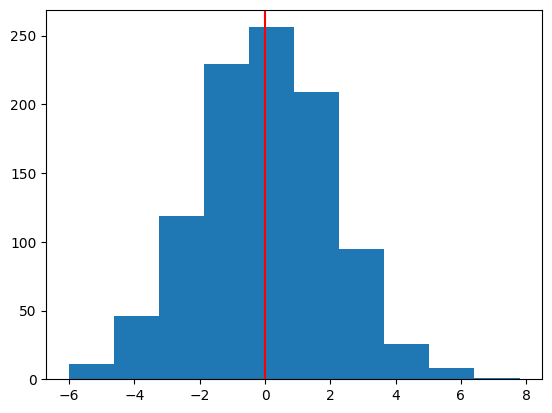

Media residuales: -8.284928298962768e-15
Resultados t-test: TtestResult(statistic=np.float64(-1.2949196037099057e-13), pvalue=np.float64(0.9999999999998967), df=np.int64(999))


In [81]:
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot
#### 1) Media cero en los errores

### Graficamente podemos mirar la distribución de los datos y graficar con una linea vertical la
### media muestral de los residuales
plt.hist(residuales)
plt.axvline(np.mean(residuales), color = 'red')
plt.show()

#### H0: E[e_i] = popmean vs H1: E[e_i] != popmean
#### Para el supuesto del modelo lineal popmean = 0
print(f"Media residuales: {np.mean(residuales)}")
print("Resultados t-test:", ttest_1samp(residuales, popmean = 0))  ## popmean se refiere al valor de la media que yo quiero testear

Con una nivel de significancia $\alpha = 0.05$, y un p-valor de $\approx 1$, como p-value > $\alpha$, no existe suficiente evidencia muestral para rechazar la hipotesis nula. Por lo tanto NO rechazo la hipotesis nula y puedo  suponer que los residuales están centrados en cero.

1) Media cero: CUMPLE

Normalidad -> Shapiro-Wilks estaditico: 0.9991617550230465, p_value=0.9427671920712353
No Normalidad -> Kolmogorov-Smirnov estaditico: 0.16638214652560265, p_value=1.1549379963110426e-24
Normalidad -> Anderson-Darling estaditico: 0.0972721109254735, valorCritico=0.784


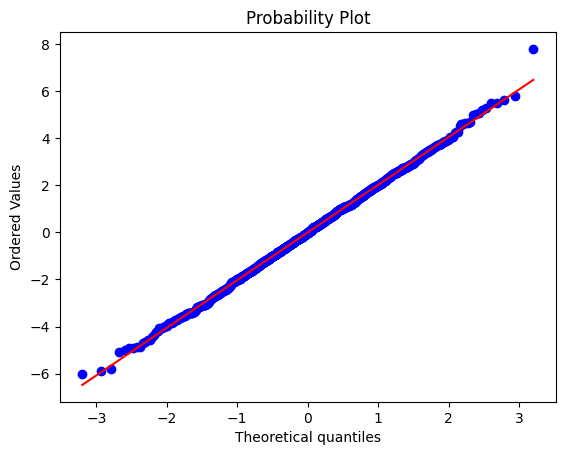

In [82]:
######################## Test de Normalidad #########################
# 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
sw = shapiro(residuales)
print(f"Normalidad -> Shapiro-Wilks estaditico: {sw[0]}, p_value={sw[1]}")


### H0: e_i~Normal vs H1: e_i !~ Normal
ks = kstest(residuales, 'norm')
print(f"No Normalidad -> Kolmogorov-Smirnov estaditico: {ks[0]}, p_value={ks[1]}")


### H0: e_i~Normal vs H1: e_i !~ Normal
ad = anderson(residuales, dist='norm')
print(f"Normalidad -> Anderson-Darling estaditico: {ad[0]}, valorCritico={ad[1][2]}")


probplot(residuales, dist = "norm", plot = plt)
plt.show()



Shapiro-Wilks:
A un nivel De significancia del 0.05 como el p-value es mayor al alpha, NO existe evidencia suficiente para rechazar Normalidad.

Kolmogorov-Smirnov:
A un nivel de significancia del 0.05 como el p-value es menor al alpha, SI existe evidencia suficiente para rechazar Normalidad.

Anderson-Darling:
A un nivel de significancia del 0.05 como el estadistico de prueba NO sobrepasa el valor crítico y NO cae en region de Rechazo, entonces, NO existe sufieciente evidencia muestral para rechazar la hipotesis nula.

2) Normalidad: CUMPLE.

3) Independencia:
Si el valor DW esta en el intervalo [1.5, 2.5], no existe sificiente evidencia muestral para rechazar la hipotesis nula -> H0, en otro caso existe evidencia muestral suficiente para rechazar la hipoteis nula -> H1.

Independencia -> Durbin-Watson estaditico: 1.9819250655292382


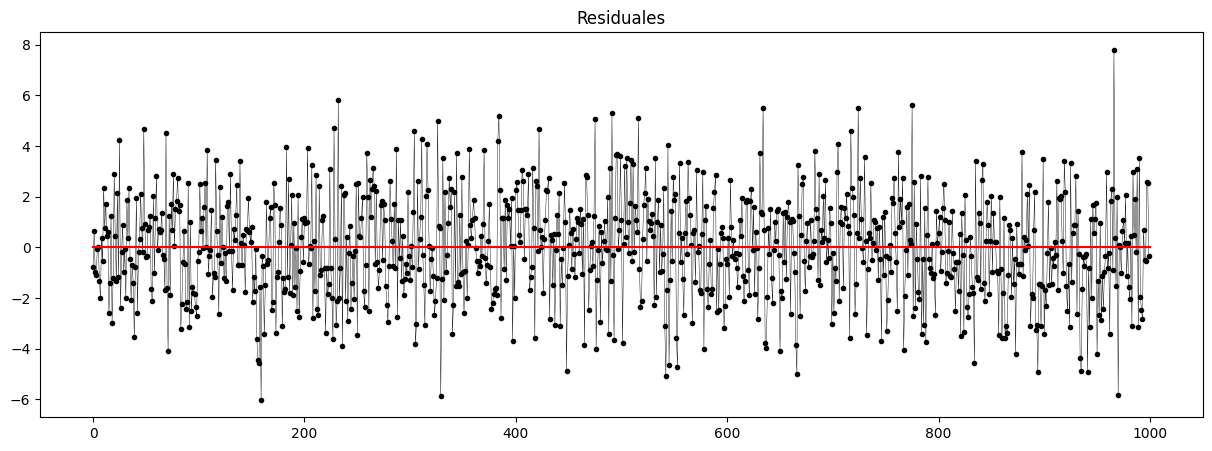

In [83]:
######################## Test de Independencia (autocorrelación de Durbin-Watson) ######
from statsmodels.stats.stattools import durbin_watson

## 3) Independencia
## H0: Corr(e_i, e_i-1)=0 vs H1: corr(e_i, e_i-1) != 0
dw = durbin_watson(residuales)
print(f"Independencia -> Durbin-Watson estaditico: {dw}")

plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)
plt.plot([0, len(residuales)], [0, 0], color = "red")
plt.title('Residuales')
plt.show()



Como el estadistico DW es menor a 2.5 y mayor a 1.5 NO existe suficiente evidencia muestral pra rechazar la hopotesis nula, por lo tanto puedo suponer independencia en los residuales.

3) Independencia: CUMPLE.

In [84]:
### 4) Homocedasticidad en los residuales

from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

## H0: Homocedasticidad vs H1: Heterocedasticidad
LM, PLM, f_test, p_value = het_breuschpagan(residuales, X, robust = False)
p_value



np.float64(0.46783499688166175)

Con un nivel de significancia del 0.05 como el p-valor asociadio al test BP es menor a alpha, NO existe suficiente evidencia muestral para rechazar la hipotesis nula, por lo tanto, suponemos homocedasticidad.

4) Homocedasticidad: CUMPLE

#### 7) Conclusión final

Al finalizar el ejercicio, se concluye que, para los datos del conjunto data2, se recomienda realizar una transformación logarítmica de la variable $X$. Esta transformación tiene como objetivo mejorar la predicción de los datos mediante un modelo de regresión lineal. Además, es importante destacar que se validaron los supuestos de dicho modelo, lo que permite asegurar que este es capaz de realizar predicciones precisas para futuros valores que puedan presentar un comportamiento similar al analizado en esta sección.